
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




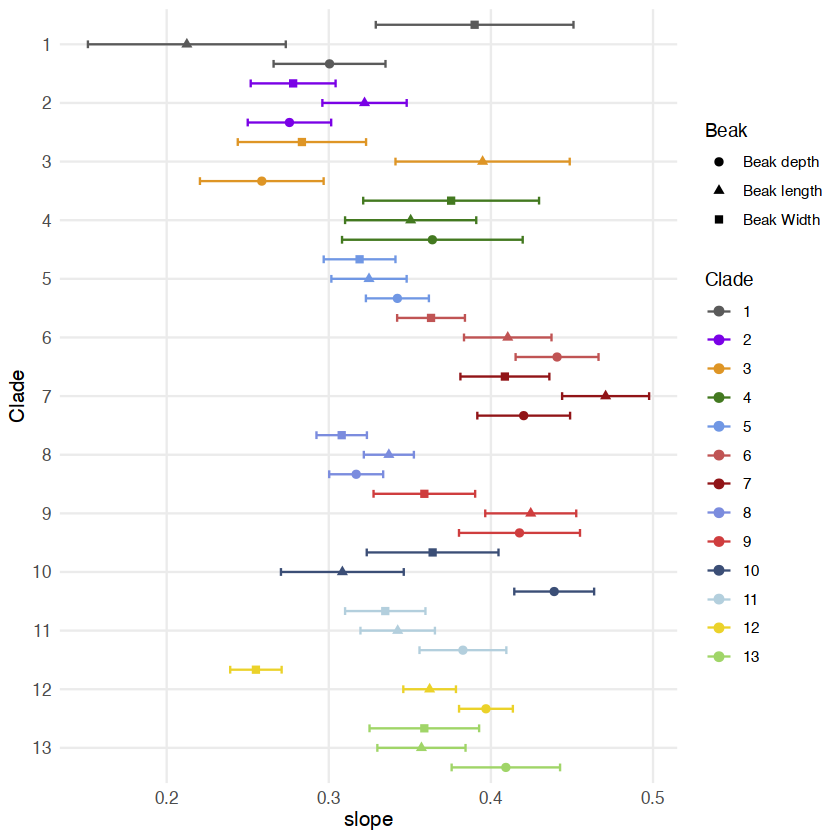

In [1]:
library(ggplot2)
library(dplyr)

data <- readRDS(file = "./allometric.rds")

data <- data %>%  mutate(
    Clade = factor(Clade, levels = sort(unique(Clade))),
    Beak  = factor(Beak, levels = c("Beak depth", "Beak length", "Beak Width"))
  )

data <- data %>%
  mutate(
    slope_lower = slope - slope_SE,
    slope_upper = slope + slope_SE
  )

p <- ggplot(data, aes(x = slope, y = Clade, color = Clade, shape=Beak)) +
  geom_point(size = 2,position=position_dodge(width = 1)) +
  geom_errorbarh(aes(xmin = slope_lower, xmax = slope_upper),position=position_dodge(width = 1),
                 height = 0.4) +
  scale_color_manual(values=c("1" = "#5A5A5A",
                              "2" = "#7A01E6",
                              "3" = "#DE9525",
                              "4" = "#437920",
                              "5" = "#7097E4",
                              "6" = "#C05454",
                              "7" = "#911417",
                              "8" = "#7B8CDE",
                              "9" = "#CF3D3E",
                              "10" = "#3B4E76",
                              "11" = "#B3CFDD",
                              "12" = "#EBD22A",
                              "13" = "#A0D568"))+
  scale_y_discrete(limits = rev(levels(data$Clade))) +
  theme_minimal() +
  theme(
    strip.text      = element_text(size = 12, face = "bold"),  # 分面标签字体
    axis.text.y     = element_text(size = 10),
    axis.text.x     = element_text(size = 10),
    axis.title      = element_text(size = 12),
    panel.grid.minor = element_blank()
  )

# 将图像打印到当前设备
p